In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
from scipy.stats import ttest_ind
import statsmodels.api as sm
from scipy.stats import pearsonr
import numpy as np


import warnings
warnings.filterwarnings('ignore')

In [86]:
df_sv = pd.read_csv("sv_clean.csv", index_col=0)
sale = df_sv.groupby(['서비스번호', '서비스명', '판매자', '서비스가격', '평점', '대분류'], as_index=False)['판매수'].sum()
sale

,서비스번호,서비스명,판매자,서비스가격,평점,대분류,판매수
0,2102.0,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",logf1,5000.0,5.0,커머스,402
1,2103.0,"엑셀 VBA, 매크로, ERP 프로그램 개발해 드립니다.",엑셀의신,10000.0,5.0,데이터,1587
2,2105.0,"엑셀을 이용 서식과 집계, 분석 및 VBA 프로그래밍",태구리,50000.0,5.0,데이터,507
3,2106.0,카페24 쇼핑몰 수정 유지보수 제작 기능개선 오류개선,오Design,5000.0,5.0,커머스,599
4,2107.0,카페24 쇼핑몰 수정 및 개선작업 해 드립니다.,WorldWiseWeb,5000.0,5.0,커머스,1185
...,...,...,...,...,...,...,...
2858,6488.0,기술중심의 백서 및 황서 제작해드립니다.,아틀란기획,850000.0,0.0,프로그래밍,1
2859,6489.0,앱개발 홈페이지제작에 필요한 앱기획 웹기획 해드립니다,어나더클래스,550000.0,0.0,모바일,7
2860,6494.0,대화형 이러닝 동영상 강의 플레이어를 설치해 드립니다.,공부나라,380000.0,0.0,기타,3
2861,6495.0,워드프레스 엘리멘토 프로를 꼼꼼히 설치해 드립니다.,공부나라,33000.0,0.0,홈페이지,1


In [87]:
ex_df = pd.read_csv("ex_clean.csv", index_col=0)
ex_df

,판매자ID,판매자,판매 서비스 수,총 판매 금액,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부
0,V2_0,김러그,326,146181660.0,가입,미사용
1,V2_1,디프라이,43,146666100.0,가입,미사용
2,V2_2,Sailorkr,14,140014500.0,가입,미사용
3,V2_3,신뢰할만한지식인65,16,130656600.0,가입,미사용
4,V2_4,에픽핫,18,126114700.0,가입,미사용
...,...,...,...,...,...,...
2061,V2_2061,web3expert,1,6400.0,미가입,미사용
2062,V2_2062,enos,2,5000.0,미가입,미사용
2063,V2_2063,K9027456501,1,5000.0,미가입,미사용
2064,V2_2064,승쿠딩,1,5000.0,가입,미사용


In [88]:
log_df = pd.read_csv("log_clean.csv", index_col=0)
log_df.head(2)

,거래일자,수수료율,고객ID,프로그램수정횟수,추가결제금액,거래취소여부,거래취소일자,서비스명,판매자,판매금액,서비스가격,평점,이용자수,대분류,서비스번호
0,20210201,6.5,5030100140,0.0,9800,0.0,0.0,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",logf1,14800.0,5000.0,5.0,584.0,커머스,2102.0
1,20210201,6.5,8020105385,0.0,0,0.0,0.0,"카페24,고도몰,메이크샵등 쇼핑몰 수정,코딩,유지보수",logf1,5000.0,5000.0,5.0,584.0,커머스,2102.0


In [89]:
cus = pd.read_csv("cus_clean.csv", index_col=0)
cus

,고객ID,사용기기,사용OS,유입경로,회원상태,거주지,연령,성별,서비스총구매수,총구매금액,총수정요청수,총추가결제금액
0,1001010041,iPhone,iOS11.4.1,유튜브,정상회원,경기도,25.0,남성,1,44500.0,0.0,14500
1,10010100410,SM-N935S,Android7.0,검색광고,정상회원,경기도,26.0,기타,1,44500.0,0.0,14500
2,100101004108,iPhone,iOS12.0,네이버블로그,정상회원,경기도,23.0,남성,1,34500.0,0.0,14500
3,100101004109,iPhone,iOS11.4.1,인스타그램,정상회원,경기도,20.0,남성,1,364500.0,0.0,14500
4,100101004112,iPhone,iOS11.4.1,직접검색,정상회원,경기도,28.0,남성,1,34500.0,0.0,14500
...,...,...,...,...,...,...,...,...,...,...,...,...
137521,9050206990,SM-N950N,Android8.0.0,유튜브,정상회원,경상도,21.0,남성,2,75000.0,0.0,20000
137522,9050206992,iPhone,iOS11.4,네이버카페,탈퇴,강원도,26.0,기타,1,310000.0,0.0,10000
137523,9050206995,iPhone,iOS12.0,인스타그램,정상회원,강원도,28.0,남성,1,89000.0,0.0,10000
137524,9050206996,SM-G930S,Android8.0.0,네이버블로그,정상회원,강원도,43.0,남성,1,9000.0,1.0,4000


## 0집단

### 평점이 4.0이하인 전문가의 수익금 합이 전체 수익금에서 몇퍼센트인지 알아내는 코드 

In [6]:
log_df['수익금'] = log_df['판매금액'] * log_df['수수료율'] / 100

log_grouped = log_df.groupby('판매자').agg({
    '평점': 'mean',
    '수익금': 'sum'
}).reset_index()

merged_df = pd.merge(ex_df, log_grouped, on='판매자', how='left')

total_revenue = merged_df['수익금'].sum()

low_rating_revenue = merged_df[merged_df['평점'] <= 4.0]['수익금'].sum()

low_rating_revenue_ratio = (low_rating_revenue / total_revenue) * 100

print(f"평점 4.0 이하인 전문가의 수익금이 전체 수익금에서 차지하는 비율: {low_rating_revenue_ratio:.2f}%")

평점 4.0 이하인 전문가의 수익금이 전체 수익금에서 차지하는 비율: 16.41%


### 수익금 상위 10%에 평점이 4.0이하인 사람이 몇명있는지 알아내는 코드

In [8]:
log_df['수익금'] = log_df['판매금액'] * log_df['수수료율'] / 100

log_grouped = log_df.groupby('판매자').agg({
    '평점': 'mean',
    '수익금': 'sum'
}).reset_index()

top_10_percent_cutoff = log_grouped['수익금'].quantile(0.9)

top_10_percent_df = log_grouped[log_grouped['수익금'] >= top_10_percent_cutoff]

top_10_percent_count = top_10_percent_df.shape[0]
low_rating_top_10_count = top_10_percent_df[top_10_percent_df['평점'] <= 4.0].shape[0]

print(f"수익금 상위 10%에 해당하는 전문가 수: {top_10_percent_count}")
print(f"수익금 상위 10%에 평점이 4.0 이하인 전문가 수: {low_rating_top_10_count}")

수익금 상위 10%에 해당하는 전문가 수: 207
수익금 상위 10%에 평점이 4.0 이하인 전문가 수: 33


### 프리미엄 서비스와 평점의 관계

In [11]:
DF = pd.merge(ex_df, log_df, on=['판매자'], how='inner')

DF2 = pd.merge(sale, DF, on=['판매자', '서비스명'], how='inner')
DF2 = DF2.loc[:, ~DF2.columns.str.endswith('_x')] 
DF2 = DF2.rename(columns=lambda x: x.rstrip('_y'))

DF3 = pd.merge(cus, DF2, on=['고객ID'], 
DF3 = DF3.loc[:, ~DF3.columns.str.endswith('_x')] 
DF3 = DF3.rename(columns=lambda x: x.rstrip('_y'))  

In [47]:
DF3.head()

,판매자,프로그램수정횟수,추가결제금액,서비스가격,평점,판매금액,거래일자,우리_이익,거래취소여부,상대적 취소율,판매자ID,판매 서비스 수,총 판매 금액,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부,클러스터,그룹
0,0to1,0.000000,31800,80000.0,5.000000,6987.500000,"[20210216, 20210216, 20210216, 20210220, 20210...","[325.0, 325.0, 375.0, 375.0, 669.5, 325.0, 630...",0.0,0.000000,V2_1914,16,111800.0,0,0,15,저가 & 추가 결제 적음
1,100ME,0.138568,1655610,38300000.0,5.000000,90524.018476,"[20210202, 20210202, 20210202, 20210202, 20210...","[4626.0, 3900.0, 3750.0, 3328.0, 3250.0, 3250....",12.0,898.700022,V2_130,433,39196900.0,1,1,9,고가 & 추가 결제 많음
2,10xDeveloper,0.102857,516470,4155000.0,4.941714,26557.257143,"[20210204, 20210204, 20210204, 20210204, 20210...","[1950.0, 3000.0, 2600.0, 2067.0, 1875.0, 1267....",0.0,0.000000,V2_958,175,4647520.0,0,0,1,중간가 & 안정적 수익
3,10년차웹개발자,0.118750,641060,3410000.0,4.846250,25131.625000,"[20210201, 20210201, 20210203, 20210203, 20210...","[975.0, 975.0, 1734.2, 975.0, 1209.0, 975.0, 9...",0.0,0.000000,V2_999,160,4021060.0,0,1,0,중간가 & 안정적 수익
4,123abc,0.000000,36300,300000.0,4.843662,168150.000000,"[20210525, 20210525]","[10179.0, 11680.5]",0.0,0.000000,V2_1762,2,336300.0,0,0,15,저가 & 추가 결제 적음


In [16]:
premium_users = DF3[DF3['프리미엄 서비스 가입여부'] == '가입']['평점']
non_premium_users = DF3[DF3['프리미엄 서비스 가입여부'] == '미가입']['평점']

t_stat, p_value = ttest_ind(premium_users, non_premium_users, equal_var=False) 

print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("프리미엄 서비스 가입 여부에 따른 평점 차이가 통계적으로 유의합니다. (p < 0.05)")
else:
    print("프리미엄 서비스 가입 여부에 따른 평점 차이가 통계적으로 유의하지 않습니다.")

t-statistic: 23.9529
p-value: 0.0000
프리미엄 서비스 가입 여부에 따른 평점 차이가 통계적으로 유의합니다. (p < 0.05)


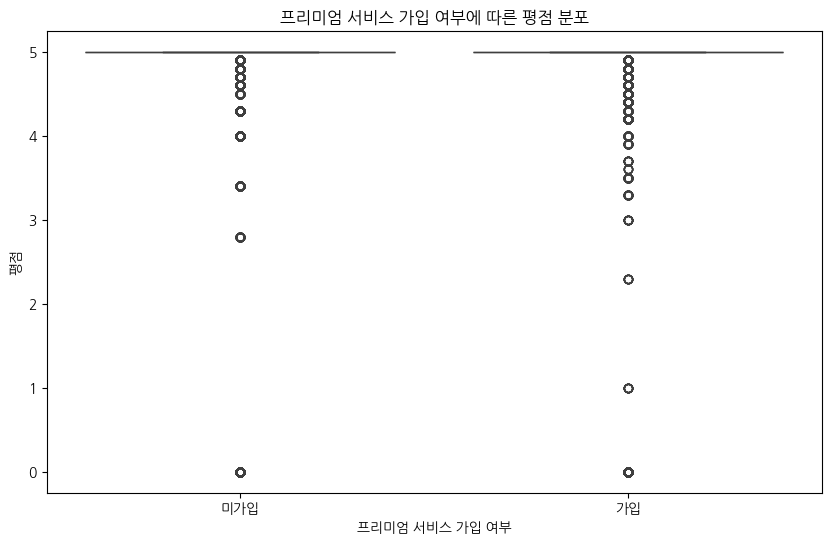

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 프리미엄 서비스 가입 여부에 따른 평점 데이터 준비
premium_yes = DF3[DF3['프리미엄 서비스 가입여부'] == '가입']['평점']
premium_no = DF3[DF3['프리미엄 서비스 가입여부'] == '미가입']['평점']

# 박스 플롯으로 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x=DF3['프리미엄 서비스 가입여부'], y=DF3['평점'])
plt.xticks([0, 1], ['미가입', '가입'])
plt.xlabel('프리미엄 서비스 가입 여부')
plt.ylabel('평점')
plt.title('프리미엄 서비스 가입 여부에 따른 평점 분포')
plt.show()


### 추가 결제금이 낮음

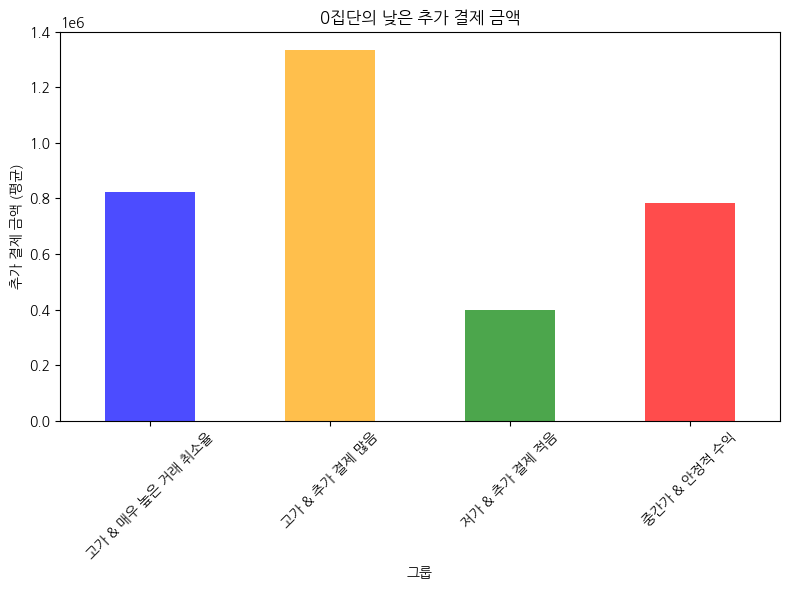

In [49]:
import matplotlib.pyplot as plt

# 각 집단의 추가 결제 금액 평균 계산
group_additional_payment = DF3.groupby('그룹')['추가결제금액'].mean()

# 시각화: 집단별 추가 결제 금액 비교
plt.figure(figsize=(8, 6))
group_additional_payment.plot(kind='bar', color=['blue', 'orange', 'green', 'red'], alpha=0.7)
plt.xlabel('그룹')
plt.ylabel('추가 결제 금액 (평균)')
plt.title('0집단의 낮은 추가 결제 금액')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 거래취소율이 높음

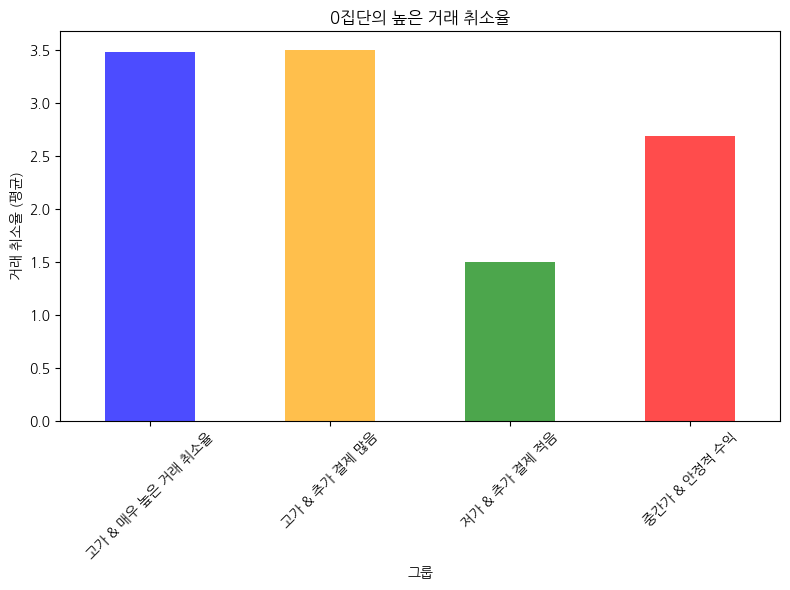

In [50]:
# 각 집단의 거래 취소율 평균 계산
group_cancellation_rate = DF3.groupby('그룹')['거래취소여부'].mean()

# 시각화: 집단별 거래 취소율 비교
plt.figure(figsize=(8, 6))
group_cancellation_rate.plot(kind='bar', color=['blue', 'orange', 'green', 'red'], alpha=0.7)
plt.xlabel('그룹')
plt.ylabel('거래 취소율 (평균)')
plt.title('0집단의 높은 거래 취소율')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


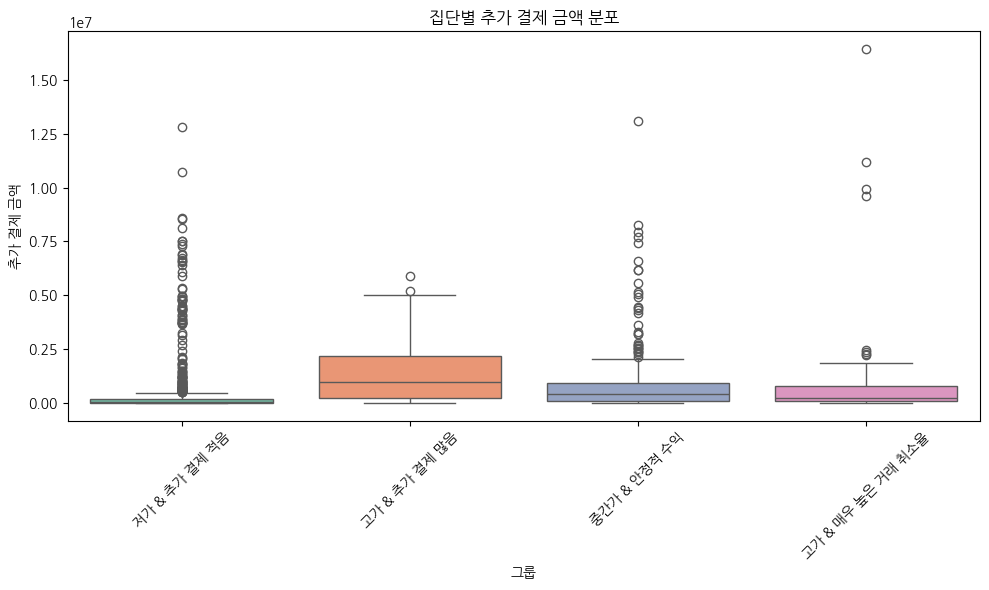

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# 박스플롯: 추가 결제 금액 분포
plt.figure(figsize=(10, 6))
sns.boxplot(data=DF3, x='그룹', y='추가결제금액', palette="Set2")
plt.xlabel('그룹')
plt.ylabel('추가 결제 금액')
plt.title('집단별 추가 결제 금액 분포')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


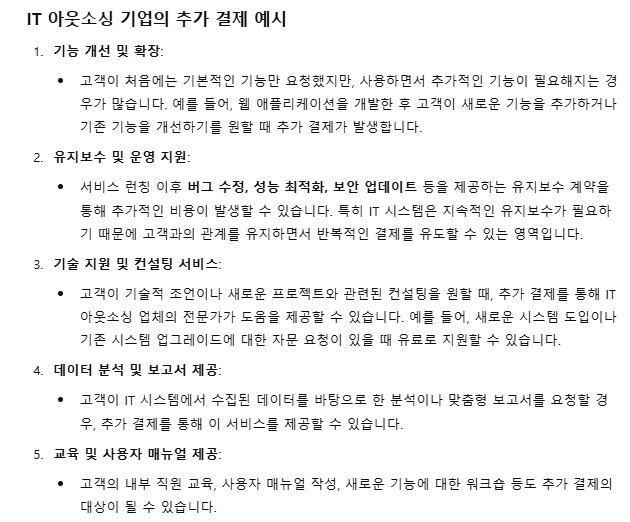

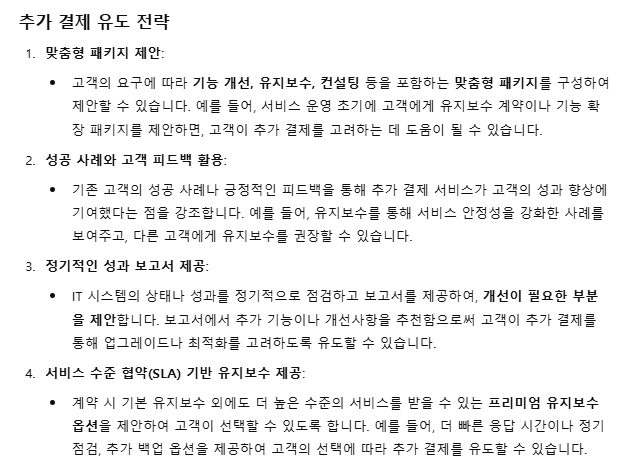

### 거래 취소율에 따른 재구매율

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Calculate the total transactions per customer to determine repurchase behavior
repurchase_data = log_df.groupby('고객ID').size().reset_index(name='총거래수')
repurchase_data['재구매여부'] = repurchase_data['총거래수'] > 1

# Step 2: Merge log_df with ex_df on '판매자' and '판매자ID'
merged_df = log_df.merge(ex_df[['판매자ID', '판매자']], on='판매자', how='left')

# Step 3: Calculate cancellation rate for each seller using '판매자ID' and '취소여부'
cancellation_data = merged_df.groupby('판매자ID')['거래취소여부'].mean().reset_index(name='취소율')

# Step 4: Merge repurchase data with merged_df for analysis
merged_df = merged_df.merge(repurchase_data[['고객ID', '재구매여부']], on='고객ID', how='left')
merged_df = merged_df.merge(cancellation_data, on='판매자ID', how='left')

# Calculate average repurchase rate by cancellation rate
repurchase_by_cancellation = merged_df.groupby('취소율')['재구매여부'].mean().reset_index(name='재구매율')

# Minimalistic visualization for cancellation rate vs. repurchase rate and save as an image
plt.figure(figsize=(8, 5))
plt.scatter(repurchase_by_cancellation['취소율'], repurchase_by_cancellation['재구매율'], color='b', label='재구매율')
plt.xlabel('거래 취소율')
plt.ylabel('재구매율')
plt.title('거래 취소율에 따른 재구매율')
plt.legend()
plt.grid(True)

# Save the plot as an image file
plt.savefig('repurchase_rate_vs_cancellation_rate.png', format='png', dpi=300)
plt.close()


## 1군집

### 평점이 높은 것이 추가 결제 금액과 어떤 상관관계를 가지는지

In [19]:
additional_payment = DF3['추가결제금액']
rating = DF3['평점']
correlation, p_value = pearsonr(additional_payment, rating)

print(f"평점과 추가 결제 금액의 상관계수: {correlation:.3f}, p-value: {p_value:.3f}")

평점과 추가 결제 금액의 상관계수: 0.004, p-value: 0.028


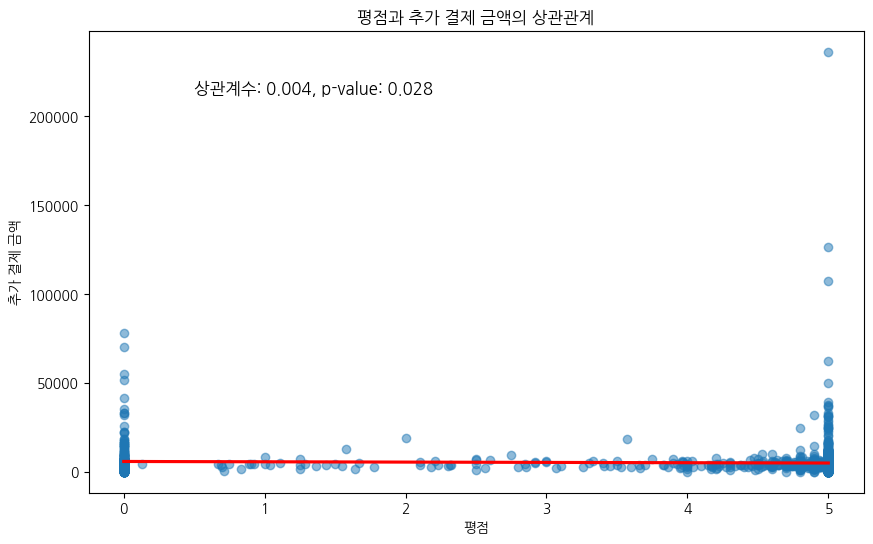

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# 산점도와 회귀선 그리기
plt.figure(figsize=(10, 6))
sns.regplot(x='평점', y='추가결제금액', data=DF3, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

# 제목과 축 레이블 설정
plt.title('평점과 추가 결제 금액의 상관관계')
plt.xlabel('평점')
plt.ylabel('추가 결제 금액')

# 상관계수와 p-value 표시
correlation_text = f"상관계수: {0.004:.3f}, p-value: {0.028:.3f}"
plt.text(0.5, max(DF3['추가결제금액']) * 0.9, correlation_text, fontsize=12, color='black')

plt.show()


### 취소율을 종속 변수로, 가격, 추가 결제 금액, 평점, 이용자수 등을 독립 변수로 하는 회귀 분석을 수행

In [27]:
import pandas as pd
import statsmodels.api as sm

# 전문가별 취소 여부 합계와 전체 거래 횟수 계산
cancel_data = log_df.groupby('판매자').agg(
    취소_횟수=('거래취소여부', 'sum'),  # 취소 여부가 1인 경우의 합
    총_거래수=('거래취소여부', 'count')  # 전체 거래 횟수
).reset_index()

# 취소율 계산
cancel_data['취소율'] = cancel_data['취소_횟수'] / cancel_data['총_거래수']

# log_df에서 필요한 컬럼들만 추출해서 전문가별 평균값 계산
log_grouped = log_df.groupby('판매자').agg({
    '서비스가격': 'mean',
    '추가결제금액': 'mean',
    '평점': 'mean',
    '이용자수': 'mean'  # 전문가별 평균 이용자수
}).reset_index()

# ex_df와 log_grouped, 그리고 취소율 데이터를 병합하여 DF3 생성
DF3 = pd.merge(ex_df, log_grouped, on='판매자', how='left')
DF3 = pd.merge(DF3, cancel_data[['판매자', '취소율']], on='판매자', how='left')

# DF3에 병합된 컬럼들 확인
print("DF3 컬럼 목록:", DF3.columns)

# 회귀 분석을 위해 필요한 컬럼 선택 및 결측값 제거
regression_data = DF3[['취소율', '서비스가격', '추가결제금액', '평점', '이용자수']].dropna()

# 독립 변수와 종속 변수 분리
X = regression_data[['서비스가격', '추가결제금액', '평점', '이용자수']]
y = regression_data['취소율']

# 상수항 추가
X = sm.add_constant(X)

# 회귀 모델 생성 및 학습
model = sm.OLS(y, X).fit()
print(model.summary())


DF3 컬럼 목록: Index(['판매자ID', '판매자', '판매 서비스 수', '총 판매 금액', '프리미엄 서비스 가입여부',
       '신속 알람 서비스 사용여부', '서비스가격', '추가결제금액', '평점', '이용자수', '취소율'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    취소율   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.476
Date:                Wed, 13 Nov 2024   Prob (F-statistic):              0.207
Time:                        12:05:45   Log-Likelihood:                 3266.7
No. Observations:                2066   AIC:                            -6523.
Df Residuals:                    2061   BIC:                            -6495.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t     

### 평점과 취소율의 관계

In [29]:
import pandas as pd
from scipy.stats import pearsonr

# 별점과 취소율 간의 상관관계 계산
correlation, p_value = pearsonr(DF3['평점'], DF3['취소율'])

# 결과 출력
print(f"피어슨 상관계수 (평점과 취소율): {correlation:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("평점과 취소율 간의 상관관계가 통계적으로 유의미합니다. (p < 0.05)")
else:
    print("평점과 취소율 간의 상관관계가 통계적으로 유의하지 않습니다. (p >= 0.05)")


피어슨 상관계수 (평점과 취소율): -0.0419
p-value: 0.0566
평점과 취소율 간의 상관관계가 통계적으로 유의하지 않습니다. (p >= 0.05)


### 1집단의 수익 차지 비율

In [33]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

log_df['우리_이익'] = log_df['판매금액'] * log_df['수수료율'] / 100

log_grouped = log_df.groupby('판매자').agg({
    '프로그램수정횟수': 'mean',
    '추가결제금액': 'sum',
    '서비스가격': 'sum',
    '평점': 'mean',
    '판매금액': 'mean',
    '거래일자': lambda x: list(x),
    '우리_이익': lambda x: list(x),
    '거래취소여부': 'sum'
}).reset_index()

overall_cancellation_rate = log_df['거래취소여부'].mean()
log_grouped['상대적 취소율'] = log_grouped['거래취소여부'] / overall_cancellation_rate

merged_df = pd.merge(log_grouped, ex_df, on='판매자', how='inner')
DF3 = merged_df.fillna(0)

DF3['프리미엄 서비스 가입여부'] = DF3['프리미엄 서비스 가입여부'].apply(lambda x: 1 if x == '가입' else 0)
DF3['신속 알람 서비스 사용여부'] = DF3['신속 알람 서비스 사용여부'].apply(lambda x: 1 if x == '사용' else 0)

average_rating = DF3[DF3['평점'] > 0]['평점'].mean()
DF3['평점'] = DF3['평점'].apply(lambda x: average_rating if x == 0 else x)

selected_columns = [
    '프로그램수정횟수', '추가결제금액', '서비스가격', '평점', 
    '프리미엄 서비스 가입여부', '신속 알람 서비스 사용여부', '판매금액', '상대적 취소율'
]
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(DF3[selected_columns])

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

kmeans = KMeans(n_clusters=20, random_state=42)
DF3['클러스터'] = kmeans.fit_predict(pca_features)

cluster_to_group = {
    0: "중간가 & 안정적 수익", 1: "중간가 & 안정적 수익", 7: "중간가 & 안정적 수익",
    10: "중간가 & 안정적 수익", 11: "중간가 & 안정적 수익",
    2: "고가 & 추가 결제 많음", 4: "고가 & 추가 결제 많음", 8: "고가 & 추가 결제 많음",
    9: "고가 & 추가 결제 많음", 12: "고가 & 추가 결제 많음",
    3: "저가 & 추가 결제 적음", 5: "저가 & 추가 결제 적음", 6: "저가 & 추가 결제 적음",
    14: "저가 & 추가 결제 적음", 15: "저가 & 추가 결제 적음",
    13: "고가 & 매우 높은 거래 취소율", 16: "고가 & 매우 높은 거래 취소율",
    17: "고가 & 매우 높은 거래 취소율", 18: "고가 & 매우 높은 거래 취소율", 19: "고가 & 매우 높은 거래 취소율"
}
DF3['그룹'] = DF3['클러스터'].map(cluster_to_group)

group_summary = DF3.groupby('그룹').agg({
    '프로그램수정횟수': 'mean',
    '추가결제금액': 'mean',
    '서비스가격': 'mean',
    '평점': 'mean',
    '판매금액': 'mean',
    '거래취소여부': 'mean',
    '상대적 취소율': 'mean',
    '판매 서비스 수': 'mean',
    '총 판매 금액': 'mean',
    '프리미엄 서비스 가입여부': 'mean',
    '신속 알람 서비스 사용여부': 'mean'
}).round(2)

group_summary['전문가 수'] = DF3.groupby('그룹').size()

In [34]:
total_revenue = DF3['총 판매 금액'].sum()
group_1_revenue = DF3[DF3['그룹'] == '고가 & 추가 결제 많음']['총 판매 금액'].sum()
group_1_revenue_ratio = (group_1_revenue / total_revenue) * 100

print(f"Group 1의 수익금이 전체 수익금에서 차지하는 비율: {group_1_revenue_ratio:.2f}%")

Group 1의 수익금이 전체 수익금에서 차지하는 비율: 40.35%


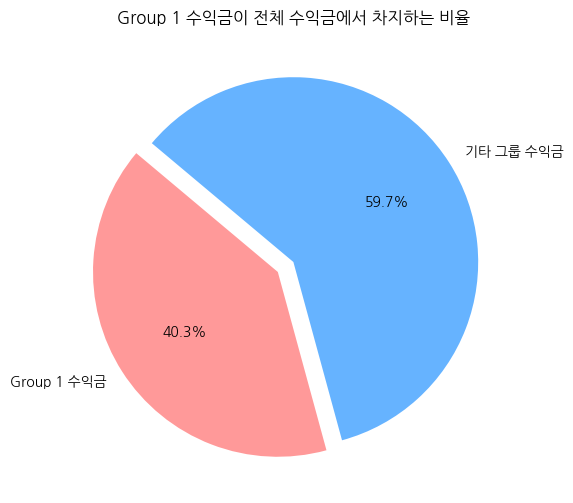

In [35]:
group_1_revenue_ratio = 40.35
other_revenue_ratio = 100 - group_1_revenue_ratio

labels = ['Group 1 수익금', '기타 그룹 수익금']
sizes = [group_1_revenue_ratio, other_revenue_ratio]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  

# 파이 차트 생성
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Group 1 수익금이 전체 수익금에서 차지하는 비율')
plt.show()

### 프리미엄 서비스 사용 여부와 거래 빈도를 기준으로 고객의 충성도와 변동성을 분석

In [ ]:
merged_df = pd.merge(log_df, ex_df[['판매자', '프리미엄 서비스 가입여부']], on='판매자', how='inner')

customer_transactions = merged_df.groupby('고객ID').agg({
    '판매금액': ['count', 'mean', 'std'],
    '프리미엄 서비스 가입여부': 'first'
}).reset_index()

customer_transactions.columns = ['고객ID', '거래 횟수', '평균 거래 금액', '거래 금액 표준편차', '프리미엄 서비스 가입여부']

premium_customers = customer_transactions[customer_transactions['프리미엄 서비스 가입여부'] == '가입']
non_premium_customers = customer_transactions[customer_transactions['프리미엄 서비스 가입여부'] == '미가입']


# 1. 프리미엄 vs 비프리미엄 거래 횟수 비교 (로그 스케일 적용)
plt.figure(figsize=(10, 6))
plt.hist(premium_customers['거래 횟수'], bins=np.logspace(0.1, 2, 30), alpha=0.5, label='프리미엄 서비스 가입 고객', color='blue')
plt.hist(non_premium_customers['거래 횟수'], bins=np.logspace(0.1, 2, 30), alpha=0.5, label='비프리미엄 서비스 가입 고객', color='orange')
plt.xscale('log')
plt.xlabel('거래 횟수 (로그 스케일)')
plt.ylabel('고객 수')
plt.title('프리미엄 서비스 가입 여부에 따른 거래 횟수 분포')
plt.legend()
plt.show()

# 2. 프리미엄 vs 비프리미엄 거래 금액 변동성 비교 (로그 스케일 적용)
plt.figure(figsize=(10, 6))
plt.hist(premium_customers['거래 금액 표준편차'], bins=np.logspace(0.1, 8, 30), alpha=0.5, label='프리미엄 서비스 가입 고객', color='blue')
plt.hist(non_premium_customers['거래 금액 표준편차'], bins=np.logspace(0.1, 8, 30), alpha=0.5, label='비프리미엄 서비스 가입 고객', color='orange')
plt.xscale('log')
plt.xlabel('거래 금액 표준편차 (로그 스케일)')
plt.ylabel('고객 수')
plt.title('프리미엄 서비스 가입 여부에 따른 거래 금액 변동성')
plt.legend()
plt.show()


## 3집단

### 이익을 날짜별로 시계열 그래프로 시각화

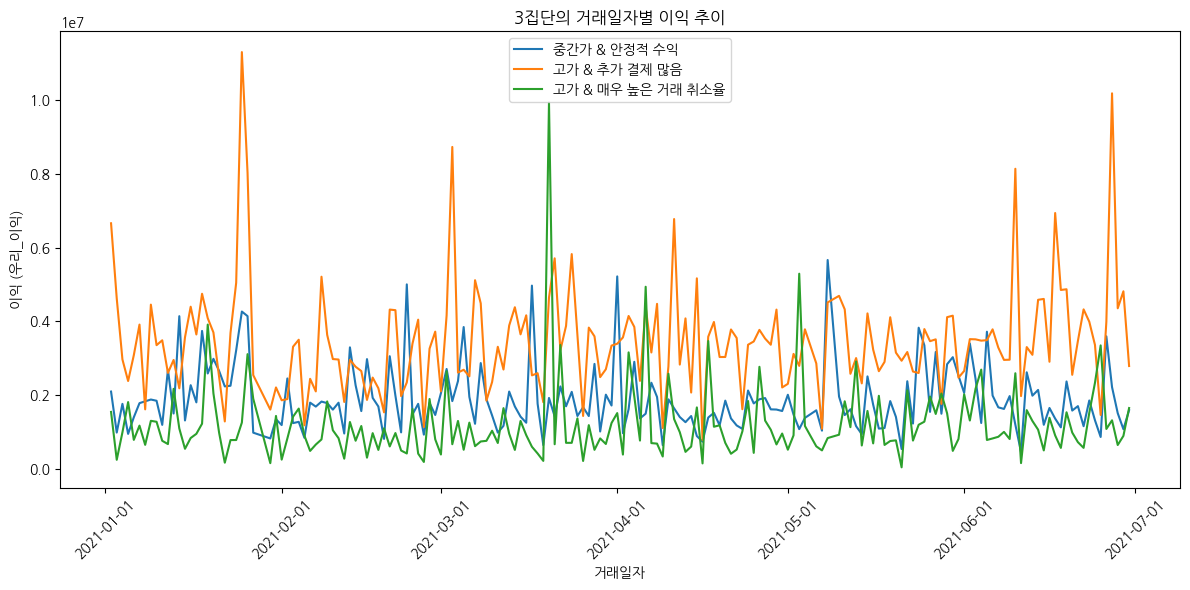

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# 거래일자와 우리_이익 열을 개별 행으로 분할
DF3_exploded = DF3.explode(['거래일자', '우리_이익']).reset_index(drop=True)

# 거래일자를 datetime 형식으로 변환
DF3_exploded['거래일자'] = pd.to_datetime(DF3_exploded['거래일자'], format='%Y%m%d')

# 그룹별 판매자 리스트 생성
group1_sellers = DF3_exploded[DF3_exploded['그룹'] == '중간가 & 안정적 수익']['판매자']
group2_sellers = DF3_exploded[DF3_exploded['그룹'] == '고가 & 추가 결제 많음']['판매자']
group3_sellers = DF3_exploded[DF3_exploded['그룹'] == '고가 & 매우 높은 거래 취소율']['판매자']

# 각 그룹별 날짜별 이익 합산
group1_revenue = DF3_exploded[DF3_exploded['판매자'].isin(group1_sellers)].groupby('거래일자')['우리_이익'].sum()
group2_revenue = DF3_exploded[DF3_exploded['판매자'].isin(group2_sellers)].groupby('거래일자')['우리_이익'].sum()
group3_revenue = DF3_exploded[DF3_exploded['판매자'].isin(group3_sellers)].groupby('거래일자')['우리_이익'].sum()

# 시계열 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(group1_revenue.index, group1_revenue.values, label='중간가 & 안정적 수익')
plt.plot(group2_revenue.index, group2_revenue.values, label='고가 & 추가 결제 많음')
plt.plot(group3_revenue.index, group3_revenue.values, label='고가 & 매우 높은 거래 취소율')
plt.xlabel('거래일자')
plt.ylabel('이익 (우리_이익)')
plt.title('3집단의 거래일자별 이익 추이')
plt.legend()

# x축 날짜 형식 지정 및 간격 조정
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 거래 횟수의 안정성 비교

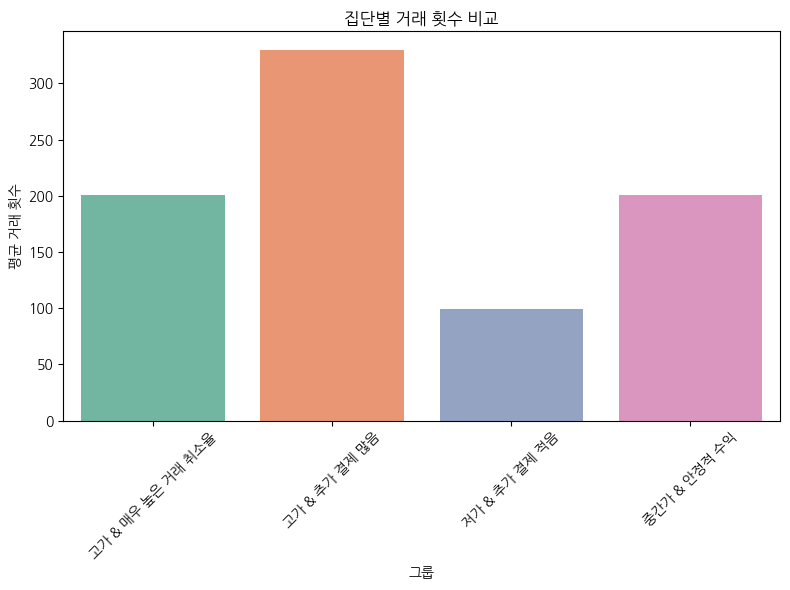

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# 각 집단의 거래 횟수 평균 계산
group_transaction_count = DF3.groupby('그룹')['판매 서비스 수'].mean()

# 시각화: 집단별 거래 횟수 비교
plt.figure(figsize=(8, 6))
sns.barplot(x=group_transaction_count.index, y=group_transaction_count.values, palette="Set2")
plt.xlabel('그룹')
plt.ylabel('평균 거래 횟수')
plt.title('집단별 거래 횟수 비교')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [56]:
# 각 집단의 거래일자별 거래 횟수 집계
group_0_transactions = group_0_df.groupby('거래일자').size()
group_1_transactions = group_1_df.groupby('거래일자').size()
group_2_transactions = group_2_df.groupby('거래일자').size()

# 각 집단의 거래 횟수 변동성 (표준편차) 계산
group_0_std = group_0_transactions.std()
group_1_std = group_1_transactions.std()
group_2_std = group_2_transactions.std()

# 결과 출력
print("0집단 거래 횟수 변동성 (표준편차):", group_0_std)
print("1집단 거래 횟수 변동성 (표준편차):", group_1_std)
print("2집단 거래 횟수 변동성 (표준편차):", group_2_std)

# 가장 변동성이 큰 집단 확인
max_variability = max(group_0_std, group_1_std, group_2_std)
if max_variability == group_0_std:
    print("가장 변동성이 큰 집단: 0집단 (저가 & 추가 결제 적음)")
elif max_variability == group_1_std:
    print("가장 변동성이 큰 집단: 1집단 (고가 & 추가 결제 많음)")
else:
    print("가장 변동성이 큰 집단: 2집단 (중간가 & 안정적 수익)")


0집단 거래 횟수 변동성 (표준편차): 176.929357004794
1집단 거래 횟수 변동성 (표준편차): 174.05985377106694
2집단 거래 횟수 변동성 (표준편차): 144.34472986209454
가장 변동성이 큰 집단: 0집단 (저가 & 추가 결제 적음)


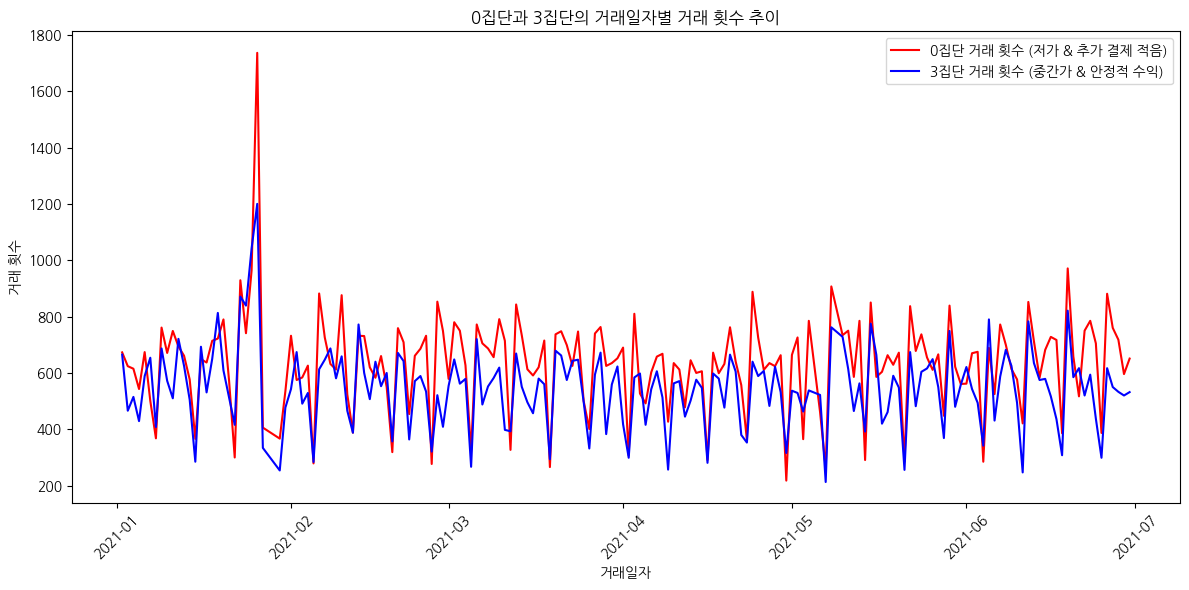

In [58]:
import matplotlib.pyplot as plt
import pandas as pd

# 거래일자를 개별 행으로 분할하여 datetime 형식으로 변환
DF3_exploded = DF3.explode('거래일자').reset_index(drop=True)
DF3_exploded['거래일자'] = pd.to_datetime(DF3_exploded['거래일자'], format='%Y%m%d')

# 0집단과 3집단 데이터 필터링
group_0_df = DF3_exploded[DF3_exploded['그룹'] == '저가 & 추가 결제 적음']
group_3_df = DF3_exploded[DF3_exploded['그룹'] == '중간가 & 안정적 수익']

# 거래일자별 거래 횟수 집계
group_0_transactions = group_0_df.groupby('거래일자').size()
group_3_transactions = group_3_df.groupby('거래일자').size()

# 시계열 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(group_0_transactions.index, group_0_transactions.values, label='0집단 거래 횟수 (저가 & 추가 결제 적음)', color='red')
plt.plot(group_3_transactions.index, group_3_transactions.values, label='3집단 거래 횟수 (중간가 & 안정적 수익)', color='blue')

# 그래프 설정
plt.xlabel('거래일자')
plt.ylabel('거래 횟수')
plt.title('0집단과 3집단의 거래일자별 거래 횟수 추이')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 2집단

### 거래 취소율을 통해 충성 고객 비율을 파악

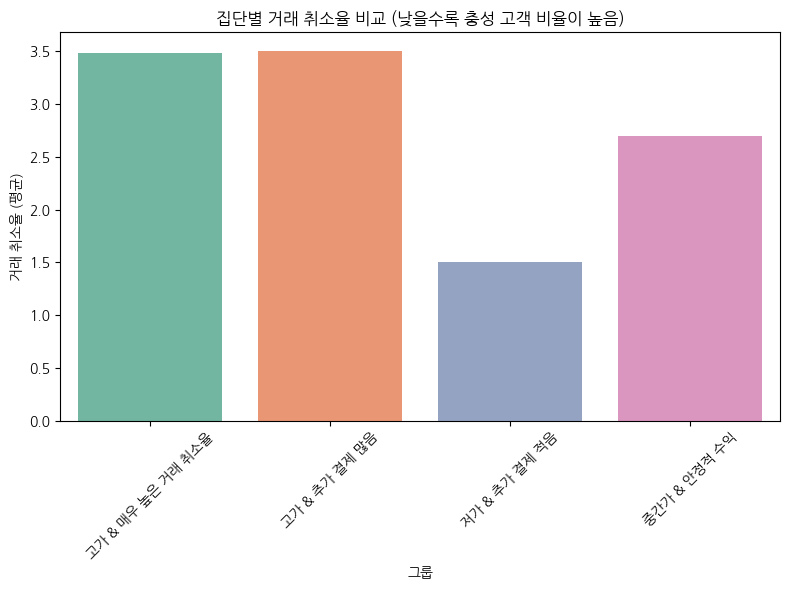

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# 각 집단의 거래 취소율 평균 계산
group_cancellation_rate = DF3.groupby('그룹')['거래취소여부'].mean()

# 시각화: 집단별 거래 취소율 비교
plt.figure(figsize=(8, 6))
sns.barplot(x=group_cancellation_rate.index, y=group_cancellation_rate.values, palette="Set2")
plt.xlabel('그룹')
plt.ylabel('거래 취소율 (평균)')
plt.title('집단별 거래 취소율 비교 (낮을수록 충성 고객 비율이 높음)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 평점과 추가 결제 금액의 상관 관계

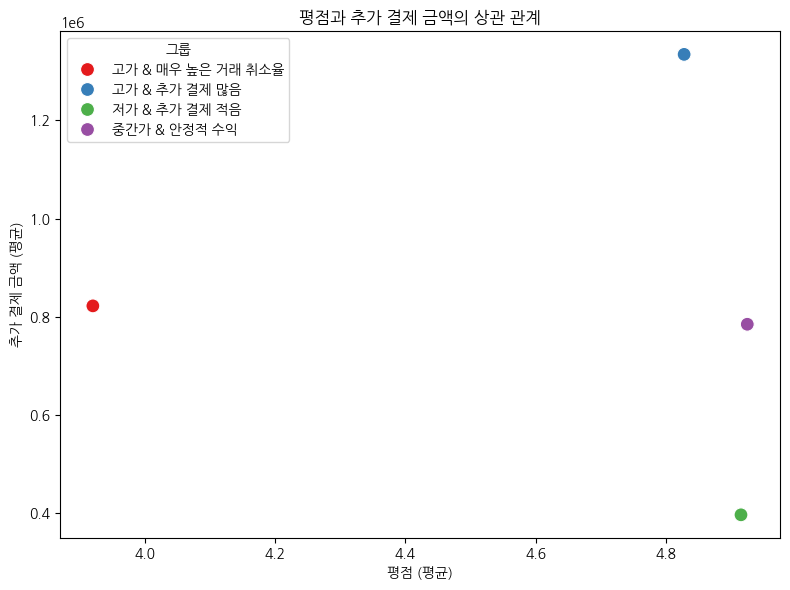

In [61]:
# 각 집단의 평점과 추가 결제 금액 평균 계산
group_avg_rating = DF3.groupby('그룹')['평점'].mean()
group_avg_payment = DF3.groupby('그룹')['추가결제금액'].mean()

# 시각화: 평점과 추가 결제 금액의 관계
plt.figure(figsize=(8, 6))
sns.scatterplot(x=group_avg_rating, y=group_avg_payment, hue=group_avg_rating.index, palette="Set1", s=100)
plt.xlabel('평점 (평균)')
plt.ylabel('추가 결제 금액 (평균)')
plt.title('평점과 추가 결제 금액의 상관 관계')
plt.legend(title='그룹')
plt.tight_layout()
plt.show()
